In [ ]:
pip install tensorflow

In [ ]:
pip install tensorflow_hub

In [70]:
import tensorflow as tf
import tensorflow_hub as hub

import matplotlib.pyplot as plt
import pandas as pd

print("Version: ", tf.__version__)
print("Eager mode: ", tf.executing_eagerly())
print("Hub version: ", hub.__version__)
print("GPU is", "available" if tf.config.list_physical_devices('GPU') else "NOT AVAILABLE")
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

Version:  2.3.1
Eager mode:  True
Hub version:  0.9.0
GPU is NOT AVAILABLE


In [71]:
ls

 Volume in drive C is OS
 Volume Serial Number is AAD3-AC16

 Directory of C:\Nisha\Fall2020\Big Data Analytics\Project

11/17/2020  09:04 AM    <DIR>          .
11/17/2020  09:04 AM    <DIR>          ..
11/16/2020  10:19 PM    <DIR>          .ipynb_checkpoints
10/24/2020  07:23 PM            10,721 Codalab-trial-dataset.csv
10/30/2020  03:21 PM            41,610 ColBERT model.ipynb
10/30/2020  04:07 PM    <DIR>          ColBERT-Using-BERT-Sentence-Embedding-for-Humor-Detection-master
10/30/2020  04:06 PM             6,186 ColBERT-Using-BERT-Sentence-Embedding-for-Humor-Detection-master.zip
10/30/2020  02:36 PM            75,473 df_test.csv
11/12/2020  11:03 PM    <DIR>          input
10/20/2020  08:45 PM        14,874,240 kaggle_dataset.csv
11/12/2020  10:42 AM            13,971 k-fold.py
10/30/2020  03:53 PM            87,622 linear_Reg.ipynb
11/12/2020  11:06 PM           888,263 LogisticRegression.pickle
11/16/2020  11:28 PM           152,327 Naive_Bayes_week5.ipynb
11/02/2020  03:

In [73]:
dataset = pd.read_csv('train.csv')
X = dataset.iloc[:,1].values
Y = dataset.iloc[:,2].values


In [74]:
label_encoder_Y = LabelEncoder()
Y = label_encoder_Y.fit_transform(Y)

In [75]:
train_examples, test_examples, train_labels, test_labels = train_test_split(X,Y, test_size=0.2,random_state=0)
print("Training entries: {}, test entries: {}".format(len(train_examples), len(test_examples)))
print("TRAIN Dataset -> ")
print(train_examples[:10])
print(" Test Dataset ->")
print(train_labels[:10])

Training entries: 6400, test entries: 1600
TRAIN Dataset -> 
['Better to have loved and lost, than to have never loved at all.'
 "I left my Adderall in my Ford Fiesta. Now it's a @FordFocus"
 "My wife and I just made a porno. Too bad she's my late wife."
 'Life consists not in holding good cards, but in playing those you hold well.'
 '"Your tongue is germ free only if it is pink. If it is white there is a thin film of bacteria on it"'
 "My wife was excited when I blindfolded her in the bedroom... until I spun her around 10 times and let her know we're playing pin the tail on the donkey."
 'Do deaf girls masturbate with one hand so they can moan with the other?'
 "People who support the Endangered Species Act haven't tasted my Bald Eagle Souffle"
 'What do you get when you mix a rhinoceros with an elephant? Elephino...'
 "Why don't feminists work cash registers? They can't make change."]
 Test Dataset ->
[0 1 1 0 0 1 1 1 1 1]


# <font color="green">Build the model </font> <br>
The neural network is created by stacking layers—this requires three main architectural decisions:
 * How to represent the text?
 * How many layers to use in the model?
 * How many *hidden units* to use for each layer? 
In this example, the input data consists of sentences. The labels to predict are either 0 or 1.

One way to represent the text is to convert sentences into embeddings vectors. We can use a pre-trained text embedding as the first layer, which will have two advantages:
 *   we don't have to worry about text preprocessing,
 *   we can benefit from transfer learning.
 
For this example we will use a model from [TensorFlow Hub] (https://www.tensorflow.org/hub) called [google/tf2-preview/gnews-swivel-20dim/1](https://tfhub.dev/google/tf2-preview/gnews-swivel-20dim/1).
There are three other models to test for the sake of this tutorial:
 * [google/tf2-preview/gnews-swivel-20dim-with-oov/1] (https://tfhub.dev/google/tf2-preview/gnews-swivel-20dim-with-oov/1) - same as [google/tf2-preview/gnews-swivel-20dim/1] (https://tfhub.dev/google/tf2-preview/gnews-swivel-20dim/1), but with 2.5% vocabulary converted to OOV buckets. This can help if vocabulary of the task and vocabulary of the model don't fully overlap.
 * [google/tf2-preview/nnlm-en-dim50/1] (https://tfhub.dev/google/tf2-preview/nnlm-en-dim50/1) - A much larger model with ~1M vocabulary size and 50 dimensions.
 * [google/tf2-preview/nnlm-en-dim128/1] (https://tfhub.dev/google/tf2-preview/nnlm-en-dim128/1) - Even larger model with ~1M vocabulary size and 128 dimensions.

Let's first create a Keras layer that uses a TensorFlow Hub model to embed the sentences, and try it out on a couple of input examples. Note that the output shape of the produced embeddings is a expected: `(num_examples, embedding_dimension)`.


In [76]:
model = "https://tfhub.dev/google/tf2-preview/nnlm-en-dim50/1"
hub_layer = hub.KerasLayer(model, output_shape=[50], input_shape=[], 
                           dtype=tf.string, trainable=True)
hub_layer(train_examples[:3])

<tf.Tensor: shape=(3, 50), dtype=float32, numpy=
array([[-1.35511488e-01, -1.75543547e-01, -9.96582769e-03,
         3.99448067e-01,  1.07409514e-01, -4.32810700e-03,
        -1.05901755e-01, -3.05875808e-01, -5.14297299e-02,
         1.76814012e-02, -1.04029872e-01, -3.10320258e-01,
        -3.60278308e-01,  4.30465937e-02, -1.76019035e-02,
        -1.88729048e-01, -5.76865077e-02, -1.35665908e-01,
         5.36003932e-02, -2.12675408e-01,  3.50426614e-01,
         1.93340555e-02,  1.97336361e-01, -5.25388233e-02,
        -2.20277697e-01,  2.89150774e-01, -3.07344317e-01,
         7.75396125e-03, -5.63099496e-02, -1.96853980e-01,
        -2.57889133e-05, -3.90704833e-02,  6.39734566e-01,
        -8.44316259e-02, -2.29987860e-01,  2.99104363e-01,
         1.88668489e-01,  1.50951371e-01,  2.56645709e-01,
         8.33157599e-02, -1.04626697e-02,  2.71416269e-02,
        -1.08837001e-01,  3.54224473e-01, -1.31628767e-01,
         1.82903409e-01, -2.86835860e-02, -2.24637166e-01,
       

<font color="green">Let's now build the full model: </font>

In [77]:
model = tf.keras.Sequential()
model.add(hub_layer)
model.add(tf.keras.layers.Dense(16, activation='relu'))
model.add(tf.keras.layers.Dense(1))
model.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
keras_layer_7 (KerasLayer)   (None, 50)                48190600  
_________________________________________________________________
dense_10 (Dense)             (None, 16)                816       
_________________________________________________________________
dense_11 (Dense)             (None, 1)                 17        
Total params: 48,191,433
Trainable params: 48,191,433
Non-trainable params: 0
_________________________________________________________________


<font color="green"> The layers are stacked sequentially to build the classifier: </font> <br>
 
 1. The first layer is a TensorFlow Hub layer. This layer uses a pre-trained Saved Model to map a sentence into its embedding vector. The model that we are using ([google/tf2-preview/gnews-swivel-20dim/1](https://tfhub.dev/google/tf2-preview/gnews-swivel-20dim/1)) splits the sentence into tokens, embeds each token and then combines the embedding. The resulting dimensions are: `(num_examples, embedding_dimension)`.
 2. This fixed-length output vector is piped through a fully-connected (`Dense`) layer with 16 hidden units.
 3. The last layer is densely connected with a single output node. This outputs logits: the log-odds of the true class, according to the model.

<font color="green"> Hidden units </font> <br>
 
The above model has two intermediate or "hidden" layers, between the input and output. 
The number of outputs (units, nodes, or neurons) is the dimension of the representational space for the layer. In other words, the amount of freedom the network is allowed when learning an internal representation.
 
If a model has more hidden units (a higher-dimensional representation space), and/or more layers, then the network can learn more complex representations. However, it makes the network more computationally expensive and may lead to learning unwanted patterns—patterns that improve performance on training data but not on the test data. This is called *overfitting*, and we'll explore it later.

<font color="green">Loss function and optimizer </font> <br>
 
A model needs a loss function and an optimizer for training. Since this is a binary classification problem and the model outputs a probability (a single-unit layer with a sigmoid activation), we'll use the `binary_crossentropy` loss function. 
 
This isn't the only choice for a loss function, you could, for instance, choose `mean_squared_error`. But, generally, `binary_crossentropy` is better for dealing with probabilities—it measures the "distance" between probability distributions, or in our case, between the ground-truth distribution and the predictions.
 
Later, when we are exploring regression problems (say, to predict the price of a house), we will see how to use another loss function called mean squared error.
 
<font color="green">Now, configure the model to use an optimizer and a loss function: </font>

In [78]:
model.compile(optimizer='adam',
              loss=tf.losses.BinaryCrossentropy(from_logits=True),
              metrics=[tf.metrics.BinaryAccuracy(threshold=0.0, name='accuracy')])


<font color="green">Create a validation set </font>

When training, we want to check the accuracy of the model on data it hasn't seen before. <br>
Create a *validation set* by setting apart 10,000 examples from the original training data. <br> 
(Why not use the testing set now? Our goal is to develop and tune our model using only the training data, then use the test data just once to evaluate our accuracy).

In [79]:
print(train_examples)

['Better to have loved and lost, than to have never loved at all.'
 "I left my Adderall in my Ford Fiesta. Now it's a @FordFocus"
 "My wife and I just made a porno. Too bad she's my late wife." ...
 "What's the most groundbreaking invention of all time? The shovel."
 "This country has become so divided, it might as well be an amoeba. Netflix, where's my comedy special?"
 "Simply acquiring knowledge doesn't mean you're growing. Growing happens when what you know that it changes how you live"]


In [80]:
x_val = train_examples[:2500]
partial_x_train = train_examples[2500:]

y_val = train_labels[:2500]
partial_y_train = train_labels[2500:]

<font color="green">Train the model </font> <br>
Train the model for 40 epochs in mini-batches of 512 samples. This is 40 iterations over all samples in the `x_train` and `y_train` tensors. While training, monitor the model's loss and accuracy on the 10,000 samples from the validation set:

In [81]:
history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=25,
                    batch_size=512,
                    validation_data=(x_val, y_val),
                    verbose=1)

Epoch 1/25
8/8 [==============================] - 6s 805ms/step - loss: 0.7013 - accuracy: 0.4692 - val_loss: 0.6846 - val_accuracy: 0.5780
Epoch 2/25
8/8 [==============================] - 6s 778ms/step - loss: 0.6643 - accuracy: 0.6556 - val_loss: 0.6608 - val_accuracy: 0.6460
Epoch 3/25
8/8 [==============================] - 6s 767ms/step - loss: 0.6332 - accuracy: 0.6941 - val_loss: 0.6380 - val_accuracy: 0.6580
Epoch 4/25
8/8 [==============================] - 6s 781ms/step - loss: 0.6000 - accuracy: 0.7177 - val_loss: 0.6141 - val_accuracy: 0.6744
Epoch 5/25
8/8 [==============================] - 6s 776ms/step - loss: 0.5644 - accuracy: 0.7505 - val_loss: 0.5879 - val_accuracy: 0.6984
Epoch 6/25
8/8 [==============================] - 6s 758ms/step - loss: 0.5251 - accuracy: 0.7869 - val_loss: 0.5592 - val_accuracy: 0.7340
Epoch 7/25
8/8 [==============================] - 6s 779ms/step - loss: 0.4818 - accuracy: 0.8287 - val_loss: 0.5283 - val_accuracy: 0.7668
Epoch 8/25
8/8 [====

<font color="green"> Evaluate the model </font> <br>
And let's see how the model performs. Two values will be returned. <br>
-> Loss (a number which represents our error, lower values are better), and <br>
-> accuracy.

In [84]:
results = model.evaluate(test_examples, test_labels)

print("*******Codalab************",results)
print(test_labels)

50/50 [==============================] - 9s 175ms/step - loss: 0.3604 - accuracy: 0.8475
*******Codalab************ [0.3603861629962921, 0.8475000262260437]
[0 1 1 ... 0 1 1]


In [85]:
codalab_data = pd.read_csv('public_dev.csv')
test_data_codalab = codalab_data['text'].values
results_codalab = model.predict_classes(test_data_codalab)
print(results_codalab)

[[1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [0]
 [1]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [1]
 [0]
 [0]
 [1]
 [0]
 [1]
 [0]
 [1]
 [1]
 [1]
 [0]
 [0]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [0]
 [1]
 [1]
 [1]
 [0]
 [1]
 [1]
 [1]
 [0]
 [1]
 [0]
 [1]
 [0]
 [0]
 [1]
 [0]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [0]
 [0]
 [0]
 [0]
 [1]
 [1]
 [0]
 [1]
 [1]
 [0]
 [0]
 [1]
 [0]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [0]
 [1]
 [1]
 [0]
 [1]
 [1]
 [1]
 [1]
 [0]
 [1]
 [0]
 [1]
 [0]
 [1]
 [1]
 [0]
 [1]
 [1]
 [1]
 [0]
 [0]
 [1]
 [1]
 [1]
 [0]
 [0]
 [1]
 [0]
 [1]
 [1]
 [1]
 [0]
 [1]
 [1]
 [0]
 [1]
 [1]
 [1]
 [1]
 [0]
 [1]
 [0]
 [0]
 [1]
 [1]
 [0]
 [1]
 [1]
 [1]
 [0]
 [0]
 [0]
 [1]
 [1]
 [0]
 [1]
 [0]
 [1]
 [1]
 [1]
 [1]
 [0]
 [0]
 [1]
 [1]
 [0]
 [1]
 [1]
 [1]
 [0]
 [1]
 [1]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [0]
 [1]
 [1]
 [1]
 [1]
 [1]
 [0]
 [1]
 [1]
 [1]
 [1]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [0]
 [0]
 [0]
 [0]
 [1]
 [1]
 [1]
 [0]
 [0]
 [0]
 [1]
 [1]
 [1]
 [1]
 [0]
 [0]
 [0]
 [1]
 [1]
 [1]
 [1]


# need to change
This fairly naive approach achieves an accuracy of about 87%. With more advanced approaches, the model should get closer to 95%.<br>

Create a graph of accuracy and loss over time<br>
`model.fit()` returns a `History` object that contains a dictionary with everything that happened during training:

In [86]:
history_dict = history.history
history_dict.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

# need to change
There are four entries: one for each monitored metric during training and validation. We can use these to plot the training and validation loss for comparison, as well as the training and validation accuracy:

In [87]:
acc = history_dict['accuracy']
val_acc = history_dict['val_accuracy']
loss = history_dict['loss']
val_loss = history_dict['val_loss']

epochs = range(1, len(acc) + 1)

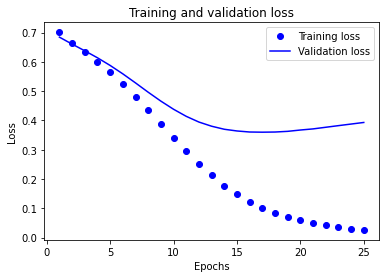

In [88]:
# "bo" is for "blue dot"
plt.plot(epochs, loss, 'bo', label='Training loss')
# b is for "solid blue line"
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

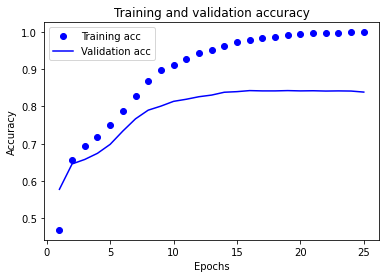

In [89]:
plt.clf()   # clear figure

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()


In this plot, the dots represent the training loss and accuracy, and the solid lines are the validation loss and accuracy.

Notice the training loss *decreases* with each epoch and the training accuracy *increases* with each epoch. This is expected when using a gradient descent optimization—it should minimize the desired quantity on every iteration.

This isn't the case for the validation loss and accuracy—they seem to peak after about twenty epochs. This is an example of overfitting: the model performs better on the training data than it does on data it has never seen before. After this point, the model over-optimizes and learns representations *specific* to the training data that do not *generalize* to test data.

For this particular case, we could prevent overfitting by simply stopping the training after twenty or so epochs. Later, you'll see how to do this automatically with a callback.